In [21]:
import os 
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [22]:
import gdown
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import train_test_split

url = 'https://drive.google.com/file/d/1-dmebEEYaMXYvKuI5qVJCDy3xDu0bO8T/view?usp=share_link'
output_path = 'data.zip'
if os.path.isfile(output_path) == False:
  gdown.download(url, output_path, quiet=False,fuzzy=True)

In [23]:
!unzip -o data.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
from PIL import Image

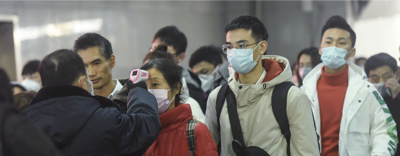

In [25]:
Image.open("data/images/maksssksksss1.png")

In [26]:
from bs4 import BeautifulSoup

In [27]:
# depends on requirement of the model, subject to change
IMAGE_SIZE = (224,224)

In [28]:
# import os
img_dir = 'data/images'
anno_dir = 'data/annotations'

labels = []
images = []
for file_name in os.listdir(img_dir):
  img_path = os.path.join(img_dir, file_name)
  anno_pth = os.path.join(anno_dir,os.path.splitext(file_name)[0])+'.xml'
  #print(img_path)
  #print(anno_pth)

  img = Image.open(img_path).convert("RGB")
  with open(anno_pth) as f:
    soup = BeautifulSoup(f.read(), 'lxml')
    obj = soup.find_all('object')
    annot = soup.find_all('annotation')


  #boxes = []
  
  for i in obj:
    x_min = int(i.find('xmin').text)
    y_min = int(i.find('ymin').text)
    x_max = int(i.find('xmax').text)
    y_max = int(i.find('ymax').text)
    #boxes.append([x_min, y_min, x_max, y_max])
    images.append(img.crop([x_min, y_min, x_max, y_max]).resize(IMAGE_SIZE))
    labels.append(i.find('name').text)

  

In [29]:
labels = np.array(labels)
labels_details = np.unique(labels,return_counts = True)

In [30]:
labels_details

(array(['mask_weared_incorrect', 'with_mask', 'without_mask'], dtype='<U21'),
 array([ 123, 3232,  717], dtype=int64))

# New Section

*italicized text*# New Section

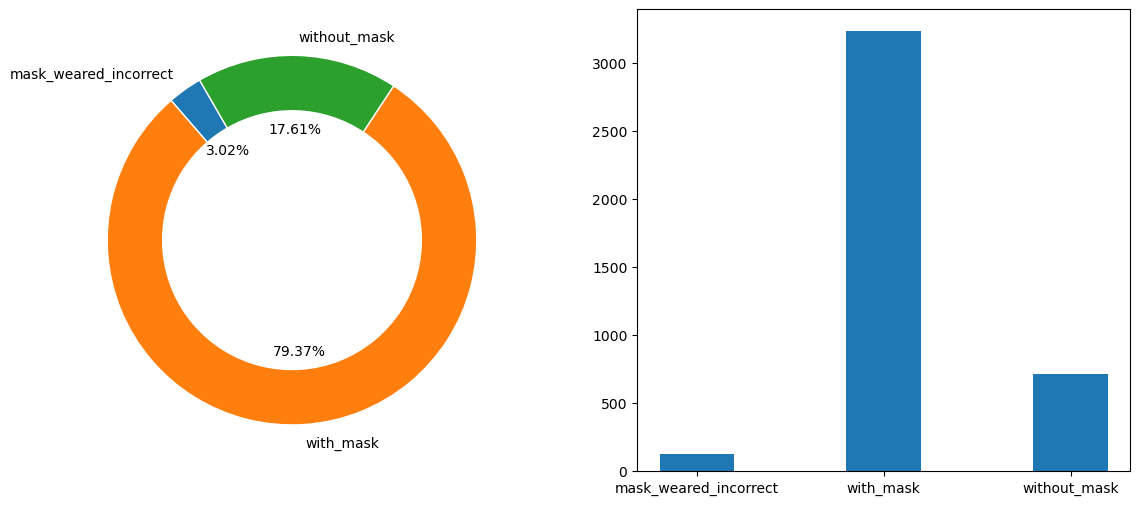

In [31]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
ax1.pie(labels_details[1],wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=labels_details[0], radius=1, startangle = 120, autopct='%1.2f%%')

ax2 = plt.bar(labels_details[0], list(labels_details[1]),width = 0.4)

plt.show()

In [32]:
img_arrays = []

for img in images:
  img_arrays.append(np.asarray(img))

len(img_arrays)

4072

without_mask


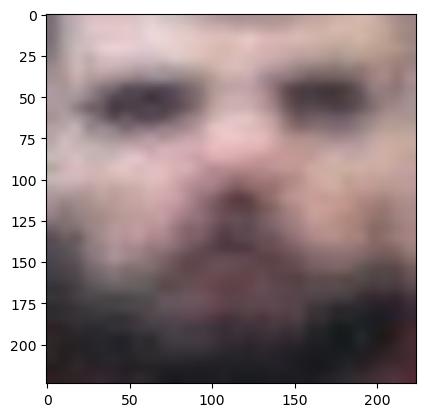

In [33]:
plt.imshow(img_arrays[0])
print(labels[0])

In [34]:
# print(img_arrays[0])

In [35]:
print(img_arrays[1].shape)

(224, 224, 3)


Normalize data to value between 0 and 1

In [36]:
img_arrays = np.array(img_arrays)

In [37]:
# normalize data
img_arrays = img_arrays/255.0

In [38]:
img_arrays[0]

array([[[0.4745098 , 0.42352941, 0.45882353],
        [0.4745098 , 0.42745098, 0.4627451 ],
        [0.48235294, 0.43137255, 0.46666667],
        ...,
        [0.61176471, 0.51764706, 0.52156863],
        [0.61176471, 0.51764706, 0.52156863],
        [0.61176471, 0.51764706, 0.52156863]],

       [[0.4745098 , 0.42352941, 0.45882353],
        [0.4745098 , 0.42745098, 0.4627451 ],
        [0.48235294, 0.43137255, 0.46666667],
        ...,
        [0.61176471, 0.51764706, 0.52156863],
        [0.61176471, 0.51764706, 0.52156863],
        [0.61176471, 0.51764706, 0.52156863]],

       [[0.4745098 , 0.42352941, 0.45882353],
        [0.4745098 , 0.42745098, 0.4627451 ],
        [0.48235294, 0.43137255, 0.46666667],
        ...,
        [0.61176471, 0.51764706, 0.52156863],
        [0.61176471, 0.51764706, 0.52156863],
        [0.61176471, 0.51764706, 0.52156863]],

       ...,

       [[0.18431373, 0.12156863, 0.13333333],
        [0.18431373, 0.12156863, 0.13333333],
        [0.18431373, 0

Label handling - Transform to onehot

In [39]:
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels)

In [40]:
labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Split data - StratifiedShuffleSplit is used for equally split portion for each label

In [41]:
TEST_SIZE = 0.15
VAL_SIZE = 0.15

In [42]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE+VAL_SIZE, random_state=3)
for train_idx, test_val_idx in sss.split(img_arrays, labels):
    X_train = img_arrays[train_idx]
    y_train = labels[train_idx]
    X_test_val = img_arrays[test_val_idx]
    y_test_val = labels[test_val_idx]
    
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=3)
for test_idx, val_idx in sss.split(X_test_val, y_test_val):
    X_test = img_arrays[test_idx]
    y_test = labels[test_idx]
    X_val = img_arrays[val_idx]
    y_val = labels[val_idx]

In [43]:
print('Shape of train image dataset: {}'.format(X_train.shape))
print('Shape of train label dataset: {}'.format(y_train.shape))
print('Shape of val image dataset: {}'.format(X_val.shape))
print('Shape of val label dataset: {}'.format(y_val.shape))
print('Shape of test image dataset: {}'.format(X_test.shape))
print('Shape of test label dataset: {}'.format(y_test.shape))
print('Shape of input: {}'.format(X_train[0].shape))

Shape of train image dataset: (2850, 224, 224, 3)
Shape of train label dataset: (2850, 3)
Shape of val image dataset: (611, 224, 224, 3)
Shape of val label dataset: (611, 3)
Shape of test image dataset: (611, 224, 224, 3)
Shape of test label dataset: (611, 3)
Shape of input: (224, 224, 3)


In [44]:
print(y_train.sum(axis=0))
print(y_test.sum(axis=0))
print(y_val.sum(axis=0))

[  86. 2262.  502.]
[ 22. 458. 131.]
[ 15. 459. 137.]


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
import tensorflow as tf


In [46]:
input_shape = X_train[0].shape
no_classes = len(labels[0])

In [47]:
print(input_shape)
print(no_classes)

(224, 224, 3)
3


In [48]:
cnn = Sequential()
cnn.add(Conv2D(16, kernel_size=(3, 3), activation='relu',input_shape=input_shape,padding='same',strides=2))
cnn.add(Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',strides=2))
cnn.add(Flatten())
cnn.add(Dense(100, activation='relu'))

cnn.add(Dense(no_classes, activation='softmax'))

cnn.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 8)         1160      
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 100)               2508900   
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 2,510,811
Trainable params: 2,510,811
Non-trainable params: 0
_________________________________________________________________


In [49]:
no_epochs= 10
batch_size = 256
cnn_history = cnn.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          validation_data = (X_val, y_val)
          )

Epoch 1/10
12/12 [==============================] - 11s 415ms/step - loss: 0.5733 - accuracy: 0.8081 - val_loss: 0.3397 - val_accuracy: 0.8903
Epoch 2/10
12/12 [==============================] - 3s 254ms/step - loss: 0.2979 - accuracy: 0.9161 - val_loss: 0.2887 - val_accuracy: 0.9100
Epoch 3/10
12/12 [==============================] - 3s 240ms/step - loss: 0.2246 - accuracy: 0.9305 - val_loss: 0.2091 - val_accuracy: 0.9411
Epoch 4/10
12/12 [==============================] - 3s 228ms/step - loss: 0.1931 - accuracy: 0.9421 - val_loss: 0.1936 - val_accuracy: 0.9378
Epoch 5/10
12/12 [==============================] - 3s 245ms/step - loss: 0.1847 - accuracy: 0.9407 - val_loss: 0.1836 - val_accuracy: 0.9509
Epoch 6/10
12/12 [==============================] - 3s 284ms/step - loss: 0.1789 - accuracy: 0.9481 - val_loss: 0.2181 - val_accuracy: 0.9165
Epoch 7/10
12/12 [==============================] - 3s 278ms/step - loss: 0.1775 - accuracy: 0.9386 - val_loss: 0.1621 - val_accuracy: 0.9509
Epoch

In [50]:

cnn.evaluate(X_test,y_test)

20/20 [==============================] - 0s 19ms/step - loss: 0.1722 - accuracy: 0.9411


[0.17219914495944977, 0.9410802125930786]

20/20 [==============================] - 0s 16ms/step


<Axes: >

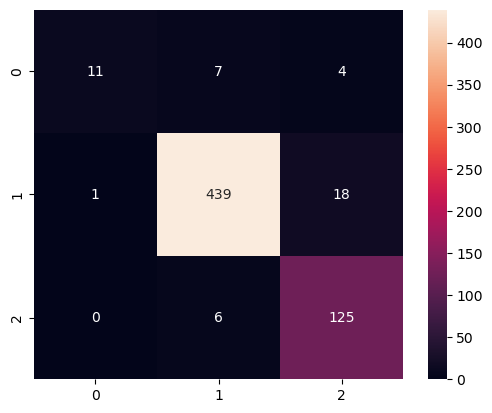

In [51]:
cnn_predictions = cnn.predict(X_test)


#plot confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

import seaborn as sns

sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1),np.argmax(cnn_predictions, axis=1)), square=True, annot=True,fmt='d')


In [52]:

print(classification_report(np.argmax(y_test, axis=1),np.argmax(cnn_predictions, axis=1)))
cnn_report = classification_report(np.argmax(y_test, axis=1),np.argmax(cnn_predictions, axis=1),output_dict=True)

              precision    recall  f1-score   support

           0       0.92      0.50      0.65        22
           1       0.97      0.96      0.96       458
           2       0.85      0.95      0.90       131

    accuracy                           0.94       611
   macro avg       0.91      0.80      0.84       611
weighted avg       0.94      0.94      0.94       611



In [53]:
from tensorflow import keras
import keras_tuner
class MyHyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        model=keras.models.Sequential()
        #providing the range for hidden layers  
        for i in range(hp.Choice('num_of_layers',[1,3,5])):         
            #providing range for number of neurons in hidden layers
            model.add(Conv2D(hp.Choice('num_of_filters',[128,64]), kernel_size=(3, 3), activation='relu',input_shape=input_shape,padding='same',strides=2))
            model.add(Conv2D(hp.Choice('num_of_filters2',[32,16,8]), kernel_size=(3, 3), activation='relu',input_shape=input_shape,padding='same',strides=2))
        
            #prevent overfit
            #model.add(keras.layers.Dropout(hp.Choice('dropout_rate',[0.1,0.3,0.5])))
           

        model.add(Flatten())
        model.add(Dense(hp.Choice('num_of_neurons',[128,64,16]), activation='relu'))

        model.add(Dense(no_classes, activation='softmax'))

        optimizer = hp.Choice("model_name", values=["sgd", "adam"])
        model.compile(
            optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"],
        )
        return model

    #providing batch size
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [256,128,64]),
            **kwargs,
        )

tuner = keras_tuner.BayesianOptimization(
    MyHyperModel(),
    objective="val_accuracy",
    max_trials=20,
    overwrite=True,
    directory="project",
    project_name="project",
)

In [54]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_of_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 3, 5], 'ordered': True}
num_of_filters (Choice)
{'default': 128, 'conditions': [], 'values': [128, 64], 'ordered': True}
num_of_filters2 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 16, 8], 'ordered': True}
num_of_neurons (Choice)
{'default': 128, 'conditions': [], 'values': [128, 64, 16], 'ordered': True}
model_name (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam'], 'ordered': False}


In [55]:
tuner.search(X_train,y_train,epochs=no_epochs,validation_data=(X_val, y_val))
best_model = tuner.get_best_models()[0]

Trial 20 Complete [00h 05m 08s]
val_accuracy: 0.9492635130882263

Best val_accuracy So Far: 0.957446813583374
Total elapsed time: 01h 14m 39s
INFO:tensorflow:Oracle triggered exit


In [56]:
tuner.get_best_hyperparameters()[0].values

{'num_of_layers': 1,
 'num_of_filters': 128,
 'num_of_filters2': 32,
 'num_of_neurons': 128,
 'model_name': 'adam',
 'batch_size': 64}

In [57]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        36896     
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 12,886,051
Trainable params: 12,886,051
Non-trainable params: 0
_________________________________________________________________


In [58]:
best_model.evaluate(X_test,y_test)

20/20 [==============================] - 2s 81ms/step - loss: 0.1711 - accuracy: 0.9378


[0.1711365133523941, 0.9378068447113037]

20/20 [==============================] - 2s 91ms/step


<Axes: >

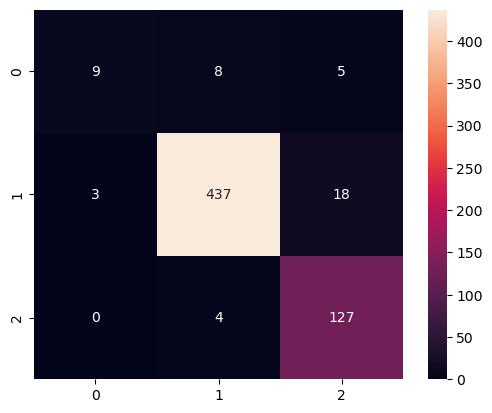

In [59]:
cnn_predictions = best_model.predict(X_test)


#plot confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

import seaborn as sns

sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1),np.argmax(cnn_predictions, axis=1)), square=True, annot=True,fmt='d')


In [60]:
print(classification_report(np.argmax(y_test, axis=1),np.argmax(cnn_predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.41      0.53        22
           1       0.97      0.95      0.96       458
           2       0.85      0.97      0.90       131

    accuracy                           0.94       611
   macro avg       0.86      0.78      0.80       611
weighted avg       0.94      0.94      0.94       611



In [61]:

from keras.utils.vis_utils import plot_model

plot_model(best_model, show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


***Unsupervised Learning***

For the unsupervised learning task, we can use an autoencoder to extract features and perform data augmentation. Autoencoders are neural networks that can learn to compress and reconstruct input data without any supervision. They can be used to generate new samples that can be added to the training set to improve the performance of the supervised learning model.


In [62]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [63]:
def create_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder


 Train the autoencoder with the original training dataset:

In [65]:
autoencoder = create_autoencoder(input_shape)
autoencoder_history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/50
23/23 [==============================] - 150s 6s/step - loss: 0.0439 - val_loss: 0.0134
Epoch 2/50
23/23 [==============================] - 129s 6s/step - loss: 0.0097 - val_loss: 0.0038
Epoch 3/50
23/23 [==============================] - 159s 7s/step - loss: 0.0031 - val_loss: 0.0021
Epoch 4/50
23/23 [==============================] - 134s 6s/step - loss: 0.0017 - val_loss: 0.0014
Epoch 5/50
23/23 [==============================] - 125s 5s/step - loss: 0.0012 - val_loss: 9.6478e-04
Epoch 6/50
23/23 [==============================] - 129s 6s/step - loss: 8.8689e-04 - val_loss: 7.8083e-04
Epoch 7/50
23/23 [==============================] - 127s 6s/step - loss: 7.4140e-04 - val_loss: 6.2886e-04
Epoch 8/50
23/23 [==============================] - 125s 5s/step - loss: 6.5335e-04 - val_loss: 6.1123e-04
Epoch 9/50
23/23 [==============================] - 116s 5s/step - loss: 5.1444e-04 - val_loss: 5.6714e-04
Epoch 10/50
23/23 [==============================] - 104s 5s/step - loss:

In [66]:
# Save the trained autoencoder model

autoencoder.save('autoencoder_model.h5')


In [67]:
from sklearn.metrics import pairwise_distances_argmin_min

# Generate new images using the autoencoder
decoded_imgs = autoencoder.predict(X_train)

# Add some noise to make the generated samples slightly different from the originals
noise_factor = 0.05
decoded_imgs += noise_factor * np.random.normal(loc=0.0, scale=1.0, size=decoded_imgs.shape)
decoded_imgs = np.clip(decoded_imgs, 0., 1.)

# Reshape the image arrays to 2D
X_train_2D = X_train.reshape(X_train.shape[0], -1)
decoded_imgs_2D = decoded_imgs.reshape(decoded_imgs.shape[0], -1)

# Find the most similar images in the original dataset for each generated image
_, closest_indices = pairwise_distances_argmin_min(decoded_imgs_2D, X_train_2D)

# Convert closest_indices to integer data type
closest_indices = closest_indices.astype(int)

# Assign the corresponding labels to the generated images
y_train_generated = y_train[closest_indices]

# Concatenate the labels of the generated images with the original labels
y_train_augmented = np.concatenate((y_train, y_train_generated), axis=0)

# Concatenate the features of the generated images with the original features
X_train_augmented = np.concatenate((X_train, decoded_imgs), axis=0)



90/90 [==============================] - 39s 429ms/step


In [68]:
print(decoded_imgs.shape)

(2850, 224, 224, 3)


In [69]:
cnn_history_augmented = cnn.fit(X_train_augmented, y_train_augmented,
                                batch_size=batch_size,
                                epochs=no_epochs)

Epoch 1/10
23/23 [==============================] - 13s 346ms/step - loss: 0.3657 - accuracy: 0.8821
Epoch 2/10
23/23 [==============================] - 6s 245ms/step - loss: 0.3000 - accuracy: 0.8937
Epoch 3/10
23/23 [==============================] - 6s 241ms/step - loss: 0.2317 - accuracy: 0.9218
Epoch 4/10
23/23 [==============================] - 6s 241ms/step - loss: 0.2084 - accuracy: 0.9281
Epoch 5/10
23/23 [==============================] - 6s 243ms/step - loss: 0.2159 - accuracy: 0.9314
Epoch 6/10
23/23 [==============================] - 6s 238ms/step - loss: 0.1754 - accuracy: 0.9400
Epoch 7/10
23/23 [==============================] - 6s 245ms/step - loss: 0.1456 - accuracy: 0.9481
Epoch 8/10
23/23 [==============================] - 5s 236ms/step - loss: 0.1300 - accuracy: 0.9532
Epoch 9/10
23/23 [==============================] - 6s 240ms/step - loss: 0.1155 - accuracy: 0.9625
Epoch 10/10
23/23 [==============================] - 6s 261ms/step - loss: 0.1703 - accuracy: 0.937

In [70]:
cnn.evaluate(X_test,y_test)

20/20 [==============================] - 0s 18ms/step - loss: 0.2085 - accuracy: 0.9296


[0.20853176712989807, 0.929623544216156]

In [71]:
cnn_predictions_augmented = cnn.predict(X_test)


20/20 [==============================] - 0s 15ms/step


In [72]:
print(classification_report(
    np.argmax(y_test, axis=1),
    np.argmax(cnn_predictions_augmented, axis=1)
))
cnn_report_augmented = classification_report(   np.argmax(y_test, axis=1),    np.argmax(cnn_predictions_augmented, axis=1),output_dict=True)
print(cnn_report_augmented)
print(cnn_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.94      0.98      0.96       458
           2       0.91      0.92      0.91       131

    accuracy                           0.93       611
   macro avg       0.62      0.63      0.62       611
weighted avg       0.90      0.93      0.91       611

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 22}, '1': {'precision': 0.9372384937238494, 'recall': 0.9781659388646288, 'f1-score': 0.9572649572649573, 'support': 458}, '2': {'precision': 0.9090909090909091, 'recall': 0.916030534351145, 'f1-score': 0.9125475285171103, 'support': 131}, 'accuracy': 0.9296235679214403, 'macro avg': {'precision': 0.6154431342715861, 'recall': 0.6313988244052579, 'f1-score': 0.6232708285940225, 'support': 611}, 'weighted avg': {'precision': 0.8974568563280395, 'recall': 0.9296235679214403, 'f1-score': 0.9132096181065334, 'support': 611}}
{'0': {'precision': 0.91

<Axes: >

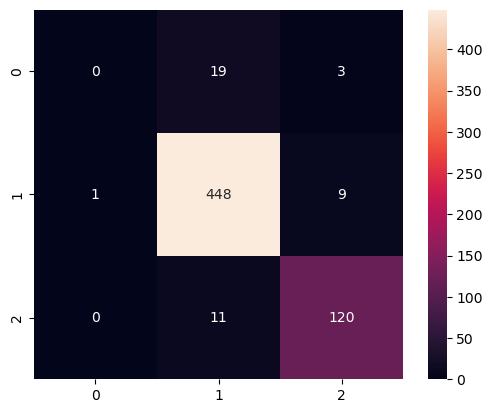

In [80]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1),np.argmax(cnn_predictions_augmented, axis=1)), square=True, annot=True,fmt='d')


State-of-the-art Model - VGG16

In [73]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

vgg16 = VGG16(include_top=False,input_shape=img_arrays[1].shape)


In [74]:
print(vgg16.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [75]:
plot_model(vgg16 ,show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Using Pretrain VGG

In [76]:
for layer in vgg16.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(3,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 3)                 75267     
                                                                 
Total params: 14,789,955
Trainable params: 75,267
Non-trainable params: 14,714,688
_________________________________________________________________


In [77]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [78]:
history = model.fit(X_train, y_train, epochs=10,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/10
23/23 [==============================] - 719s 32s/step - loss: 0.7425 - accuracy: 0.7393 - val_loss: 0.4192 - val_accuracy: 0.7725
Epoch 2/10
23/23 [==============================] - 706s 31s/step - loss: 0.3624 - accuracy: 0.8382 - val_loss: 0.3341 - val_accuracy: 0.8249
Epoch 3/10
23/23 [==============================] - 575s 25s/step - loss: 0.2900 - accuracy: 0.8849 - val_loss: 0.2836 - val_accuracy: 0.8642
Epoch 4/10
23/23 [==============================] - 513s 22s/step - loss: 0.2536 - accuracy: 0.9081 - val_loss: 0.2531 - val_accuracy: 0.9002
Epoch 5/10
23/23 [==============================] - 500s 22s/step - loss: 0.2256 - accuracy: 0.9323 - val_loss: 0.2206 - val_accuracy: 0.9362
Epoch 6/10
23/23 [==============================] - 500s 22s/step - loss: 0.2027 - accuracy: 0.9372 - val_loss: 0.2093 - val_accuracy: 0.9329
Epoch 7/10
23/23 [==============================] - 575s 25s/step - loss: 0.1883 - accuracy: 0.9449 - val_loss: 0.1943 - val_accuracy: 0.9525
Epoch 

In [79]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 122s 6s/step - loss: 0.1877 - accuracy: 0.9509


[0.18773001432418823, 0.950900137424469]

In [ ]:
sota_prediction = model.predict(X_test)

 1/20 [>.............................] - ETA: 3s

2023-04-14 18:27:45.760238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 5s 247ms/step


<AxesSubplot:>

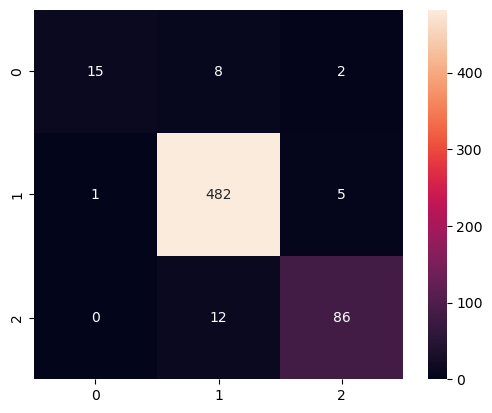

In [ ]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1),np.argmax(sota_prediction, axis=1)), square=True, annot=True,fmt='d')


In [ ]:
print(classification_report(np.argmax(y_test, axis=1),np.argmax(sota_prediction, axis=1)))
cnn_report = classification_report(np.argmax(y_test, axis=1),np.argmax(sota_prediction, axis=1),output_dict=True)

              precision    recall  f1-score   support

           0       0.94      0.60      0.73        25
           1       0.96      0.99      0.97       488
           2       0.92      0.88      0.90        98

    accuracy                           0.95       611
   macro avg       0.94      0.82      0.87       611
weighted avg       0.95      0.95      0.95       611



Train new model with VGG

In [55]:
vgg16 = VGG16(include_top=False,input_shape=img_arrays[1].shape)

model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(3,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 3)                 75267     
                                                                 
Total params: 14,789,955
Trainable params: 14,789,955
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [57]:
history = model.fit(X_train, y_train, epochs=10,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/10


2023-04-14 22:04:36.437227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 2.4849 - accuracy: 0.7018

2023-04-14 22:05:57.820124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 87s 4s/step - loss: 2.4849 - accuracy: 0.7018 - val_loss: 0.5117 - val_accuracy: 0.8445
Epoch 2/10
23/23 [==============================] - 82s 4s/step - loss: 0.5419 - accuracy: 0.8007 - val_loss: 0.3450 - val_accuracy: 0.8985
Epoch 3/10
23/23 [==============================] - 84s 4s/step - loss: 0.2859 - accuracy: 0.9168 - val_loss: 0.2254 - val_accuracy: 0.9313
Epoch 4/10
23/23 [==============================] - 84s 4s/step - loss: 0.2120 - accuracy: 0.9302 - val_loss: 0.1930 - val_accuracy: 0.9444
Epoch 5/10
23/23 [==============================] - 83s 4s/step - loss: 0.2104 - accuracy: 0.9312 - val_loss: 0.1952 - val_accuracy: 0.9362
Epoch 6/10
23/23 [==============================] - 84s 4s/step - loss: 0.2055 - accuracy: 0.9372 - val_loss: 0.2102 - val_accuracy: 0.9378
Epoch 7/10
23/23 [==============================] - 83s 4s/step - loss: 0.1928 - accuracy: 0.9393 - val_loss: 0.1993 - val_accuracy: 0.9378
Epoch 8/10
23/23 [=============

In [58]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 5s 228ms/step - loss: 0.4525 - accuracy: 0.9051


[0.4524915814399719, 0.9050736427307129]

In [59]:
sota_new_prediction = model.predict(X_test)

2023-04-14 22:18:37.912292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 5s 230ms/step


<AxesSubplot:>

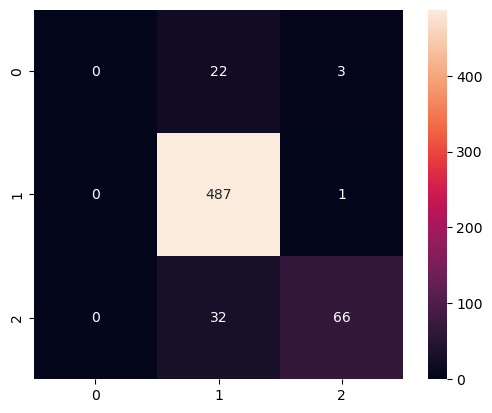

In [62]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1),np.argmax(sota_new_prediction, axis=1)), square=True, annot=True,fmt='d')


In [63]:
print(classification_report(np.argmax(y_test, axis=1),np.argmax(sota_new_prediction, axis=1)))
cnn_report = classification_report(np.argmax(y_test, axis=1),np.argmax(sota_new_prediction, axis=1),output_dict=True)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.90      1.00      0.95       488
           2       0.94      0.67      0.79        98

    accuracy                           0.91       611
   macro avg       0.61      0.56      0.58       611
weighted avg       0.87      0.91      0.88       611



/Users/jasonli/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jasonli/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jasonli/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jasonli/mini